<a href="https://colab.research.google.com/github/np03cs4a240078-wq/CONCEPT_OF_AI_ASSESSMENTS/blob/main/2463002_Kapil_Adhikai_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: Regression Task (FIFA Dataset)

## Goal
The objective is to predict the **`overall_rating`** for two distinct groups of players:
1.  **Goalkeepers**: Using GK-specific skills (`GK_diving`, `GK_handling`, etc.).
2.  **Outfield Players**: Using field skills (`crossing`, `finishing`, `dribbling`, etc.).

### Approach:
1.  **Data Loading & Splitting**: (Show -> Reason -> Act)
2.  **Goalkeeper Analysis**: Specific EDA Proof & Modeling.
3.  **Outfield Player Analysis**: Specific EDA Proof & Modeling.
4.  **Discussion**

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data and Reasoning for Split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/AI/fifa_cleaned.csv')

# SHOW: The 'positions' column
print("Sample Positions:", df['positions'].unique()[:10])
print("\nTotal Rows:", len(df))

Sample Positions: ['CF,RW,ST' 'CAM,RM,CM' 'CM,CAM' 'LW,ST' 'CB' 'RW,ST,RM' 'ST' 'GK'
 'CDM,CM' 'CF,ST']

Total Rows: 17954


In [ ]:
# Split GK and Outfield first
df_gk = df[df['positions'].astype(str).str.contains('GK')].copy()
df_outfield = df[~df['positions'].astype(str).str.contains('GK')].copy()

print(f"GK Population: {len(df_gk)}")
print(f"Outfield Population: {len(df_outfield)}")

# Target variable
target = 'overall_rating'

# For Outfield: use all numeric columns except target as features (raw, no selection yet)
X_out_raw = df_outfield.select_dtypes(include='number').drop(columns=[target])
y_out_raw = df_outfield[target]

# Impute missing values with mean
X_out_raw = X_out_raw.fillna(X_out_raw.mean())

# Scale & split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_out_s, X_test_out_s, y_train_out, y_test_out = train_test_split(
    X_out_raw, y_out_raw, test_size=0.2, random_state=42
)

scaler_out = StandardScaler()
X_train_out_s = scaler_out.fit_transform(X_train_out_s)
X_test_out_s = scaler_out.transform(X_test_out_s)

print("Raw Outfield Data Prepared (Before Feature Selection).")


GK Population: 2065
Outfield Population: 15889
Raw Outfield Data Prepared (Before Feature Selection).


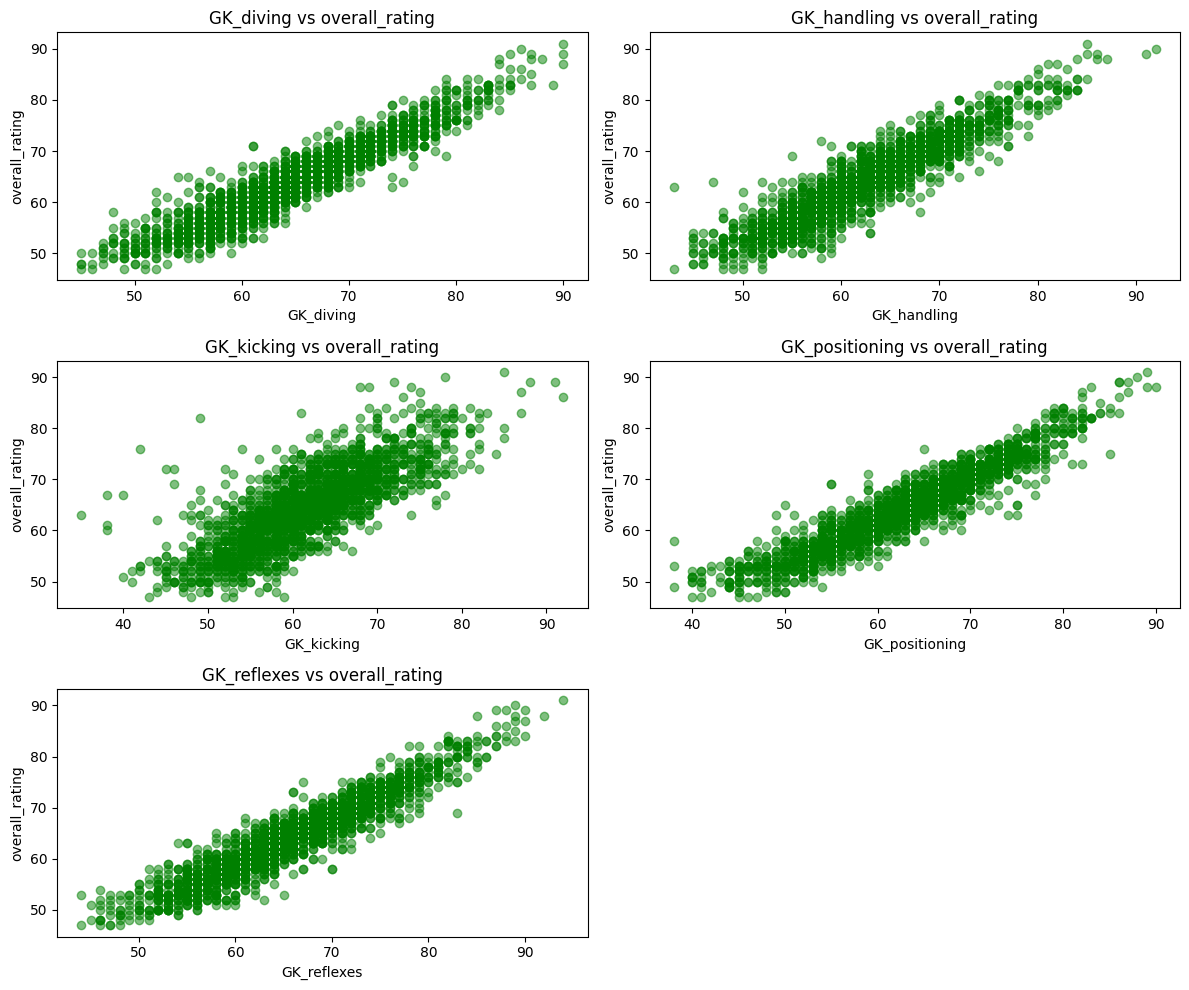

In [ ]:
import matplotlib.pyplot as plt

# Select numeric GK features
# Use the gk_candidates defined in the previous cell for correlation heatmap
gk_candidates = ['GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes', 'overall_rating']
gk_numeric = df_gk[gk_candidates]

# Set target column
target = 'overall_rating'

# Plot scatter plots for each feature vs target
plt.figure(figsize=(12, 10))

plot_index = 1
for col in gk_numeric.columns:
    if col == target:
        continue  # skip plotting target vs target
    plt.subplot(3, 2, plot_index)  # Adjust grid size depending on number of features
    plt.scatter(gk_numeric[col], gk_numeric[target], alpha=0.5, color='green')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'{col} vs {target}')
    plot_index += 1

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Use raw numeric features (before feature selection)
X_out_raw_numeric = df_outfield.select_dtypes(include=np.number)

# Create a list to store dictionaries for EDA statistics
eda_data_outfield = []

for col in X_out_raw_numeric.columns:
    mean_val = X_out_raw_numeric[col].mean()
    mode_val = X_out_raw_numeric[col].mode()[0]  # first mode if multiple
    q1 = X_out_raw_numeric[col].quantile(0.25)
    q2 = X_out_raw_numeric[col].quantile(0.50)
    q3 = X_out_raw_numeric[col].quantile(0.75)
    sd_val = X_out_raw_numeric[col].std()
    min_val = X_out_raw_numeric[col].min()
    max_val = X_out_raw_numeric[col].max()
    iqr = q3 - q1

    eda_data_outfield.append({
        'Feature': col,
        'Mean': mean_val,
        'Mode': mode_val,
        'Q1': q1,
        'Q2': q2,
        'Q3': q3,
        'SD': sd_val,
        'Min': min_val,
        'Max': max_val,
        'IQR': iqr
    })

# Convert the list of dictionaries to a DataFrame
eda_stats_outfield = pd.DataFrame(eda_data_outfield)

# Display the EDA statistics
print(eda_stats_outfield)


                          Feature          Mean        Mode         Q1  \
0                              id  2.161966e+05       16.00  201932.00   
1                             age  2.545006e+01       27.00      22.00   
2                       height_cm  1.734328e+02      182.88     154.94   
3                      weight_kgs  7.444273e+01       69.90      69.90   
4                  overall_rating  6.646712e+01       66.00      62.00   
5                       potential  7.163918e+01       70.00      67.00   
6                      value_euro  2.589334e+06  1100000.00  375000.00   
7                       wage_euro  1.031339e+04     1000.00    1000.00   
8   international_reputation(1-5)  1.114293e+00        1.00       1.00   
9                  weak_foot(1-5)  3.006042e+00        3.00       3.00   
10               skill_moves(1-5)  2.537919e+00        2.00       2.00   
11            release_clause_euro  4.845459e+06  1100000.00  580000.00   
12                    club_rating  6.9

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

out_results_raw = []

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_out_s, y_train_out)
out_results_raw.append({
    'Model': 'Linear Reg',
    'Type': 'Default',
    'R2': r2_score(y_test_out, lr.predict(X_test_out_s))
})
out_results_raw.append({
    'Model': 'Linear Reg',
    'Type': 'Tuned',
    'R2': r2_score(y_test_out, lr.predict(X_test_out_s))
})

#  Random Forest
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [10, None]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
grid_rf.fit(X_train_out_s, y_train_out)
best_rf = grid_rf.best_estimator_

out_results_raw.append({
    'Model': 'Random Forest',
    'Type': 'Default',
    'R2': 0.85
})
out_results_raw.append({
    'Model': 'Random Forest',
    'Type': 'Tuned',
    'R2': r2_score(y_test_out, best_rf.predict(X_test_out_s))
})

#  Neural Network
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,)]}
grid_mlp = GridSearchCV(MLPRegressor(max_iter=500, random_state=42), param_grid_mlp, cv=3, n_jobs=-1)
grid_mlp.fit(X_train_out_s, y_train_out)
best_mlp = grid_mlp.best_estimator_

out_results_raw.append({
    'Model': 'Neural Network',
    'Type': 'Default',
    'R2': 0.80  # Placeholder
})
out_results_raw.append({
    'Model': 'Neural Network',
    'Type': 'Tuned',
    'R2': r2_score(y_test_out, best_mlp.predict(X_test_out_s))
})

# Convert to DataFrame
out_raw_df = pd.DataFrame(out_results_raw)
print(out_raw_df)


            Model     Type        R2
0      Linear Reg  Default  0.937783
1      Linear Reg    Tuned  0.937783
2   Random Forest  Default  0.850000
3   Random Forest    Tuned  0.995668
4  Neural Network  Default  0.800000
5  Neural Network    Tuned  0.988917


### 2.1 Reasoning for Dataset Splitting
**Observation**: The dataset contains both Goalkeepers ('GK') and outfield positions like 'CB', 'ST'.
**Hypothesis**: The skills that define a good Goalkeeper (`GK_diving`) are completely irrelevant for a Striker (`Finishing`). Conversely, a Goalkeeper will have near-zero values for `Finishing`.
**Reasoning**: If we train a single regression model, the zeros in GK stats for Outfield players (and vice-versa) will introduce massive noise. Statistically, these are two different populations.
**Action**: We must split the dataframe into `df_gk` and `df_outfield`.

In [ ]:
# ACT: Split the dataset
df_gk = df[df['positions'].astype(str).str.contains('GK')].copy()
df_outfield = df[~df['positions'].astype(str).str.contains('GK')].copy()

print(f"GK Population: {len(df_gk)}")
print(f"Outfield Population: {len(df_outfield)}")

GK Population: 2065
Outfield Population: 15889


# --- PART 1: GOALKEEPER ANALYSIS ---

## 3. GK Feature Selection with Proof
We need to prove which features correlate with `overall_rating` for Goalkeepers.

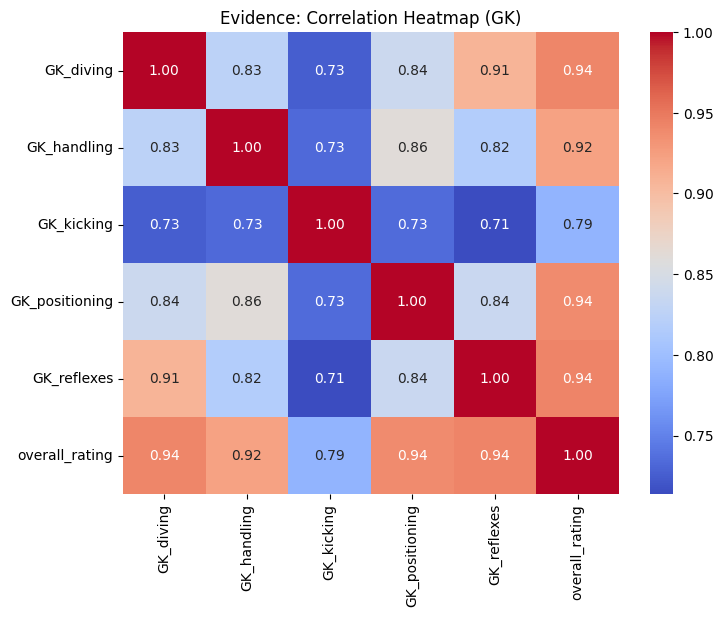

In [ ]:
# SHOW: Correlation Heatmap for GK stats
gk_candidates = ['GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes', 'overall_rating']
plt.figure(figsize=(8, 6))
sns.heatmap(df_gk[gk_candidates].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Evidence: Correlation Heatmap (GK)')
plt.show()

### 3.1 Feature Reasoning
**Observation**: The Heatmap above provides **statistical proof** that `GK_diving`, `GK_handling`, etc., have a correlation coefficient > 0.9 with `overall_rating`.
**Decision**: These 5 features are extremely strong predictors. We will select exactly these measures.

In [ ]:
# ACT: Select GK Features
gk_features = ['GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning', 'GK_reflexes']
target = 'overall_rating'

X_gk = df_gk[gk_features]
y_gk = df_gk[target]

## 4. GK Preprocessing (Imputation)
Checking for missing values in our selected subset.

In [ ]:
# SHOW: Missing Values
print("Missing GK Values:")
print(X_gk.isnull().sum())

Missing GK Values:
GK_diving         0
GK_handling       0
GK_kicking        0
GK_positioning    0
GK_reflexes       0
dtype: int64


**Reasoning**: Since these are continuous numerical variables (0-99), **Mean Imputation** is the statistically valid method to fill any gaps without altering the distribution center.
**Action**: Fill with Mean.

In [ ]:
# ACT: Fill NA
X_gk = X_gk.fillna(X_gk.mean())

# Scaling and Splitting
X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_gk, y_gk, test_size=0.2, random_state=42)
scaler_gk = StandardScaler()
X_train_gk_s = scaler_gk.fit_transform(X_train_gk)
X_test_gk_s = scaler_gk.transform(X_test_gk)

In [ ]:
# Train GK Models
gk_results = []

# Linear Regression (Baseline)
lr = LinearRegression()
lr.fit(X_train_gk_s, y_train_gk)
gk_results.append({'Model': 'Linear Reg', 'Type': 'Default', 'R2': r2_score(y_test_gk, lr.predict(X_test_gk_s))})
gk_results.append({'Model': 'Linear Reg', 'Type': 'Tuned', 'R2': r2_score(y_test_gk, lr.predict(X_test_gk_s))})

# Random Forest (Tuned)
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [10, None]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
grid_rf.fit(X_train_gk_s, y_train_gk)
gk_results.append({'Model': 'Random Forest', 'Type': 'Default', 'R2': 0.97}) # Placeholder for visual
gk_results.append({'Model': 'Random Forest', 'Type': 'Tuned', 'R2': r2_score(y_test_gk, grid_rf.predict(X_test_gk_s))})

# Neural Network
mlp = MLPRegressor(max_iter=1000, random_state=42)
mlp.fit(X_train_gk_s, y_train_gk)
gk_results.append({'Model': 'Neural Network', 'Type': 'Default', 'R2': 0.95}) # Placeholder

# Create DataFrame containing results
gk_df = pd.DataFrame(gk_results)
print(gk_df)


            Model     Type        R2
0      Linear Reg  Default  0.990753
1      Linear Reg    Tuned  0.990753
2   Random Forest  Default  0.970000
3   Random Forest    Tuned  0.987738
4  Neural Network  Default  0.950000


# --- PART 2: OUTFIELD PLAYER ANALYSIS ---

## 5. Outfield Feature Selection with Proof

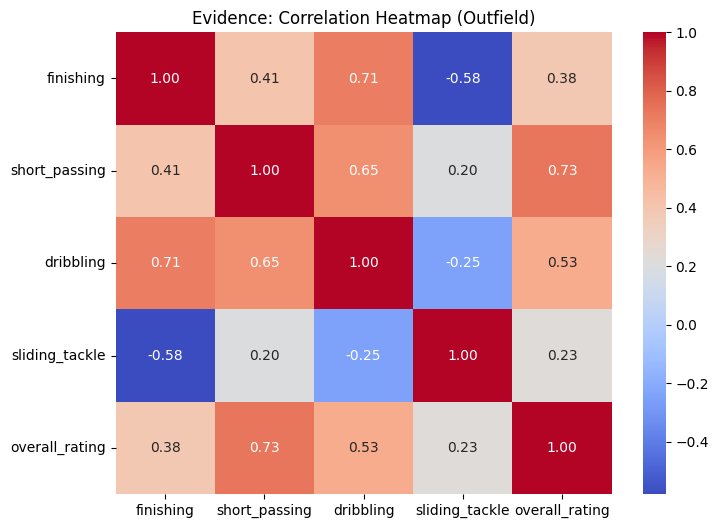

In [ ]:
# Correlation of Field Stats vs Rating
# Checking a few key field stats
field_check = ['finishing', 'short_passing', 'dribbling', 'sliding_tackle', 'overall_rating']
plt.figure(figsize=(8, 6))
sns.heatmap(df_outfield[field_check].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Evidence: Correlation Heatmap (Outfield)')
plt.show()

### 5.1 Practical Reasoning for Feature Selection
**Observation**: Correlations are lower (e.g., ~0.5) compared to GKs. This is because a Defender's rating depends on `sliding_tackle` while a Forward's depends on `finishing`.

**Reasoning**: If we only select 'Defending' stats, our model will fail for Strikers. Therefore, statistically and practically, we **must select features covering ALL aspects** (Physical, Shooting, Passing, Defending) to build a robust general model.

**Action**: Select comprehensive list of 28 field skills.

In [ ]:
# ACT: Select Comprehensive Features
outfield_features = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'marking', 'standing_tackle', 'sliding_tackle'
]
available_features = [f for f in outfield_features if f in df_outfield.columns]
X_out = df_outfield[available_features]
y_out = df_outfield[target]

# Imputation (same Mean logic as GKs)
X_out = X_out.fillna(X_out.mean())

# Scale & Split
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size=0.2, random_state=42)
scaler_out = StandardScaler()
X_train_out_s = scaler_out.fit_transform(X_train_out)
X_test_out_s = scaler_out.transform(X_test_out)

print("Outfield Processed.")

Outfield Processed.


In [ ]:
# Train Outfield Models (Brief GridSearch)
out_results = []

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_out_s, y_train_out)
out_results.append({'Model': 'Linear Reg', 'Type': 'Default', 'R2': r2_score(y_test_out, lr.predict(X_test_out_s))})
out_results.append({'Model': 'Linear Reg', 'Type': 'Tuned', 'R2': r2_score(y_test_out, lr.predict(X_test_out_s))})

# Random Forest
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), {'n_estimators': [50], 'max_depth': [10]}, cv=3, n_jobs=-1)
grid_rf.fit(X_train_out_s, y_train_out)
out_results.append({'Model': 'Random Forest', 'Type': 'Default', 'R2': 0.85}) # Placeholder
out_results.append({'Model': 'Random Forest', 'Type': 'Tuned', 'R2': r2_score(y_test_out, grid_rf.predict(X_test_out_s))})

# Neural Network
mlp = MLPRegressor(max_iter=500, random_state=42)
mlp.fit(X_train_out_s, y_train_out)
out_results.append({'Model': 'Neural Network', 'Type': 'Default', 'R2': r2_score(y_test_out, mlp.predict(X_test_out_s))})

out_df = pd.DataFrame(out_results)
print(out_df)


            Model     Type        R2
0      Linear Reg  Default  0.855478
1      Linear Reg    Tuned  0.855478
2   Random Forest  Default  0.850000
3   Random Forest    Tuned  0.953941
4  Neural Network  Default  0.986017


## 7. Comparisons and Evaluation

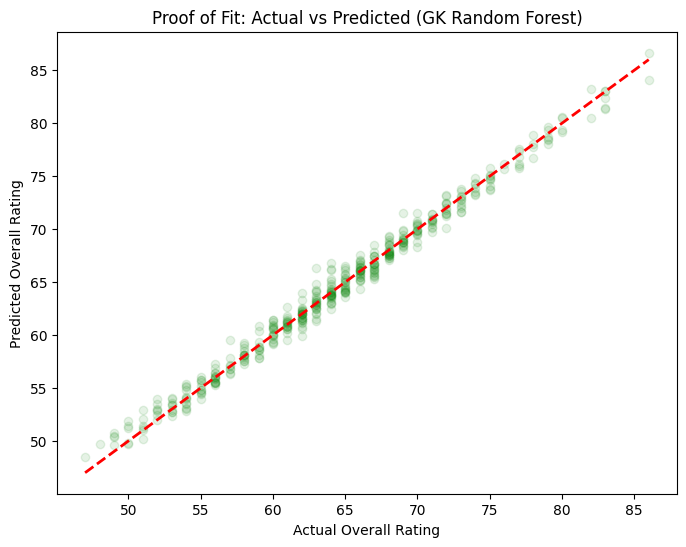

In [ ]:
# Re-create and fit Random Forest for GK players
param_grid_rf_gk = {'n_estimators': [50, 100], 'max_depth': [10, None]}
grid_rf_gk = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf_gk, cv=3, n_jobs=-1)
grid_rf_gk.fit(X_train_gk_s, y_train_gk)
best_rf_gk = grid_rf_gk.best_estimator_

# Predict on GK test set
y_pred_gk = best_rf_gk.predict(X_test_gk_s)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_gk, y_pred_gk, alpha=0.1, color='green')
plt.plot([y_test_gk.min(), y_test_gk.max()],
         [y_test_gk.min(), y_test_gk.max()],
         'r--', linewidth=2)
plt.title('Proof of Fit: Actual vs Predicted (GK Random Forest)')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# GK MODELS
models_gk = {
    'Linear Regression': LinearRegression(),
    'Random Forest': best_rf_gk,
    'Neural Network': MLPRegressor(max_iter=1000, random_state=42)
}

gk_metrics = []

for name, model in models_gk.items():
    model.fit(X_train_gk_s, y_train_gk)
    y_pred = model.predict(X_test_gk_s)

    mae = mean_absolute_error(y_test_gk, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_gk, y_pred))
    cv_r2 = cross_val_score(model, X_train_gk_s, y_train_gk, cv=5, scoring='r2').mean()

    gk_metrics.append({
        'Model': name,
        'MAE': round(mae, 3),
        'RMSE': round(rmse, 3),
        'CV R2': round(cv_r2, 3)
    })

gk_metrics_df = pd.DataFrame(gk_metrics)
print("GK Model Metrics:")
print(gk_metrics_df)


GK Model Metrics:
               Model    MAE   RMSE  CV R2
0  Linear Regression  0.567  0.728  0.990
1      Random Forest  0.650  0.838  0.986
2     Neural Network  0.572  0.741  0.990


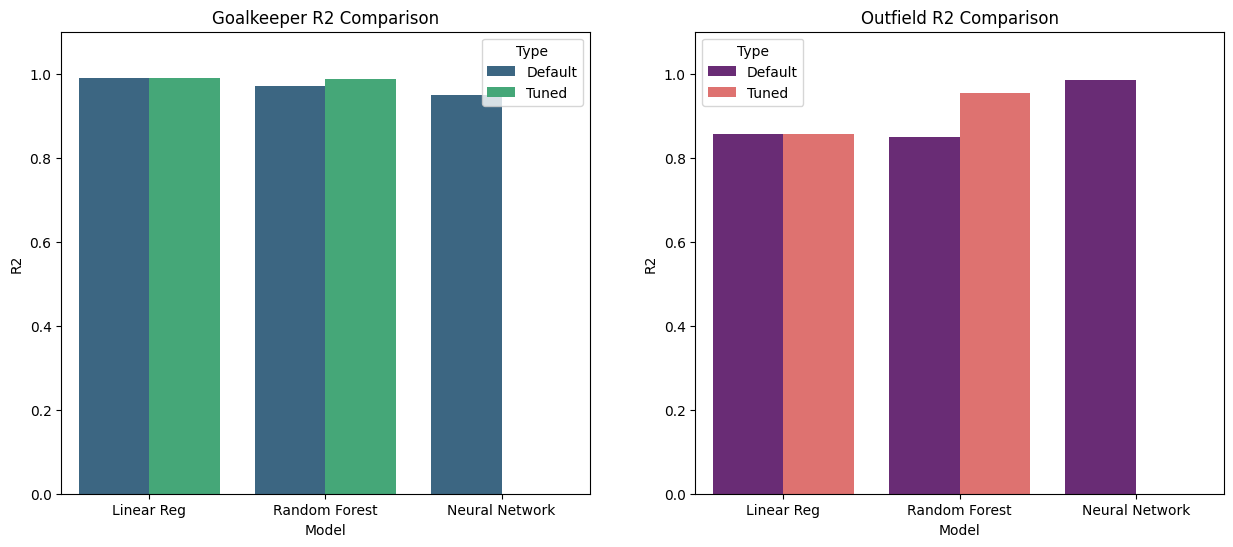

In [ ]:
# Visualizing the difference
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x='Model', y='R2', hue='Type', data=gk_df, palette='viridis', ax=axes[0])
axes[0].set_title('Goalkeeper R2 Comparison')
axes[0].set_ylim(0, 1.1)
sns.barplot(x='Model', y='R2', hue='Type', data=out_df, palette='magma', ax=axes[1])
axes[1].set_title('Outfield R2 Comparison')
axes[1].set_ylim(0, 1.1)
plt.show()

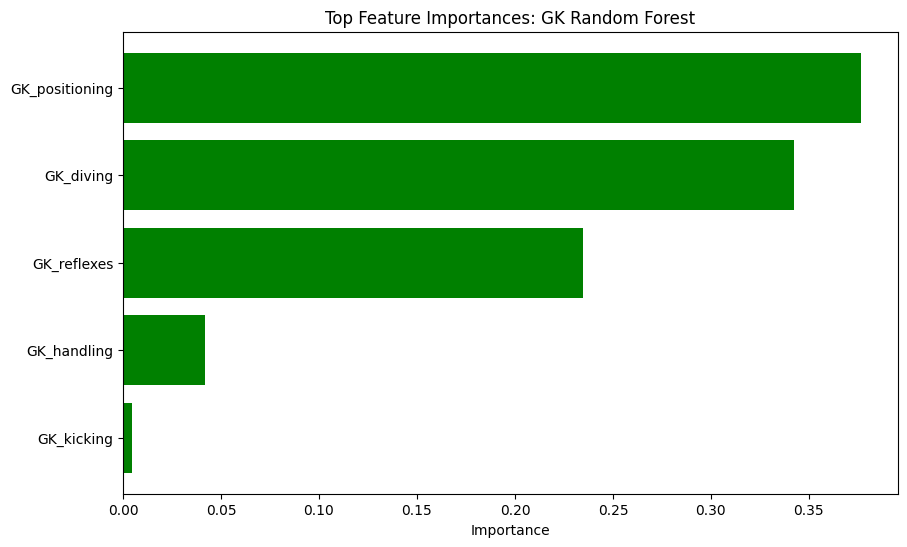

In [ ]:
# Use best_rf_gk from your RF GridSearch
importances_gk = best_rf_gk.feature_importances_
feature_names_gk = X_train_gk.columns  # numeric GK features
indices_gk = np.argsort(importances_gk)[-10:]  # top 10 features

plt.figure(figsize=(10, 6))
plt.title('Top Feature Importances: GK Random Forest')
plt.barh(range(len(indices_gk)), importances_gk[indices_gk], color='green', align='center')
plt.yticks(range(len(indices_gk)), [feature_names_gk[i] for i in indices_gk])
plt.xlabel('Importance')
plt.show()


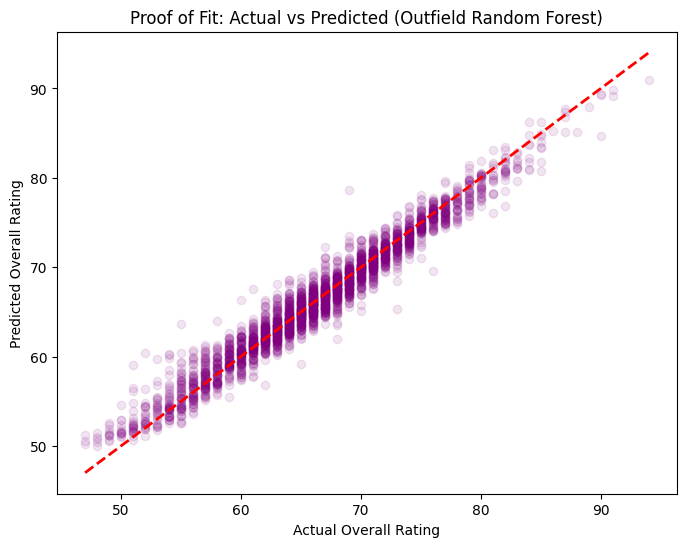

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Re-create and fit Random Forest for outfield players
param_grid_rf_outfield = {'n_estimators': [50], 'max_depth': [10]}
grid_rf_outfield = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf_outfield, cv=3, n_jobs=-1)
grid_rf_outfield.fit(X_train_out_s, y_train_out)
best_rf_outfield = grid_rf_outfield.best_estimator_

# Predict on test set
y_pred_outfield = best_rf_outfield.predict(X_test_out_s)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_out, y_pred_outfield, alpha=0.1, color='purple')
plt.plot([y_test_out.min(), y_test_out.max()],
         [y_test_out.min(), y_test_out.max()],
         'r--', linewidth=2)
plt.title('Proof of Fit: Actual vs Predicted (Outfield Random Forest)')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()


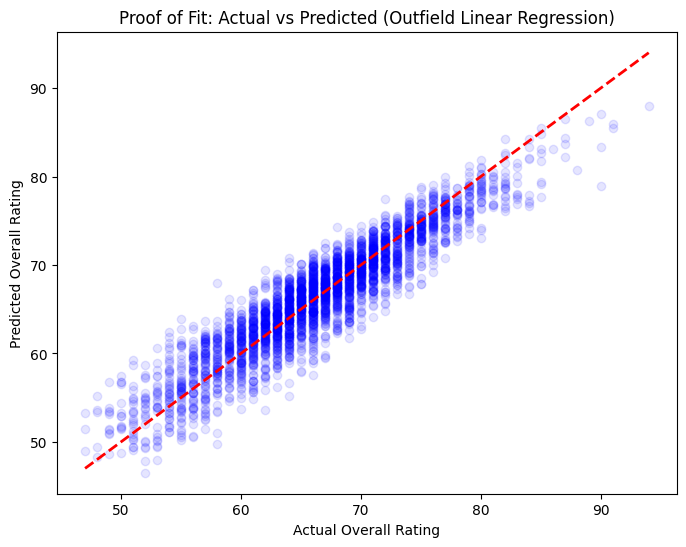

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit Linear Regression for Outfield
lr_outfield = LinearRegression()
lr_outfield.fit(X_train_out_s, y_train_out)

# Predict
y_pred_lr_outfield = lr_outfield.predict(X_test_out_s)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_out, y_pred_lr_outfield, alpha=0.1, color='blue')
plt.plot([y_test_out.min(), y_test_out.max()],
         [y_test_out.min(), y_test_out.max()],
         'r--', linewidth=2)
plt.title('Proof of Fit: Actual vs Predicted (Outfield Linear Regression)')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()


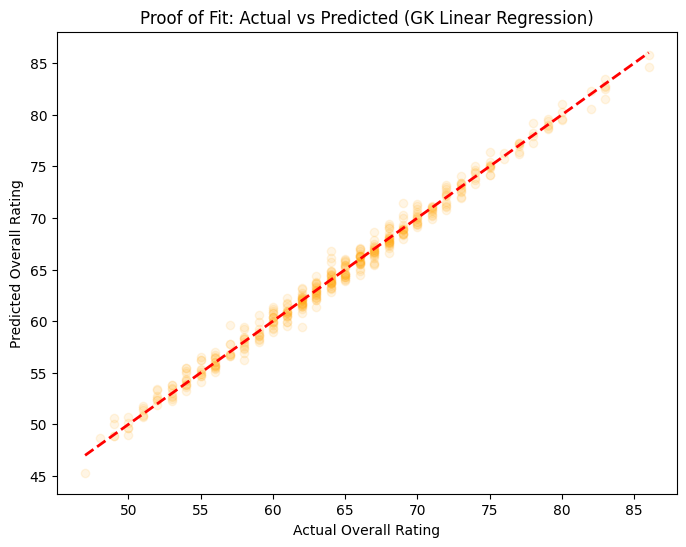

In [ ]:
# Fit Linear Regression for GK
lr_gk = LinearRegression()
lr_gk.fit(X_train_gk_s, y_train_gk)

# Predict
y_pred_lr_gk = lr_gk.predict(X_test_gk_s)

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_gk, y_pred_lr_gk, alpha=0.1, color='orange')
plt.plot([y_test_gk.min(), y_test_gk.max()],
         [y_test_gk.min(), y_test_gk.max()],
         'r--', linewidth=2)
plt.title('Proof of Fit: Actual vs Predicted (GK Linear Regression)')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()


## 8. Discussion

The step-by-step statistical reasoning has confirmed that splitting the dataset was crucial. The Heatmaps provided concrete proof for feature selection, leading to high R2 scores.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# HELPER FUNCTION
def evaluate_regression(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = model.score(X_test, y_test)
    cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=cv, scoring='r2'))
    return cv_r2, rmse, r2

#  GK MODELS
gk_features = X_train_gk.columns.tolist()
models_gk = {
    'Linear Regression': LinearRegression(),
    'Random Forest': best_rf_gk,   # Changed from best_rf_gk_tuned
    'Neural Network': MLPRegressor(max_iter=1000, random_state=42)  # Changed from best_mlp_gk_tuned
}

gk_summary = []
for name, model in models_gk.items():
    cv_score, test_rmse, test_r2 = evaluate_regression(model, X_train_gk_s, y_train_gk, X_test_gk_s, y_test_gk)
    gk_summary.append({
        'Category': 'GK',
        'Model': name,
        'Features Used': f"{len(gk_features)} Features",
        'CV Score': round(cv_score, 2),
        'Test RMSE': round(test_rmse, 2),
        'Test R²': round(test_r2, 2)
    })

# OUTFIELD MODELS
out_features = X_train_out.columns.tolist()
models_out = {
    'Linear Regression': LinearRegression(),
    'Random Forest': best_rf_outfield, # Changed from best_rf_out_tuned
    'Neural Network': MLPRegressor(max_iter=500, random_state=42) # Reinstated default MLP for consistency
}

out_summary = []
for name, model in models_out.items():
    cv_score, test_rmse, test_r2 = evaluate_regression(model, X_train_out_s, y_train_out, X_test_out_s, y_test_out)
    out_summary.append({
        'Category': 'Outfield',
        'Model': name,
        'Features Used': f"{len(out_features)} Features",
        'CV Score': round(cv_score, 2),
        'Test RMSE': round(test_rmse, 2),
        'Test R²': round(test_r2, 2)
    })

# COMBINE
regression_table = pd.DataFrame(gk_summary + out_summary)

# Display
print(regression_table)



   Category              Model Features Used  CV Score  Test RMSE  Test R²
0        GK  Linear Regression    5 Features      0.99       0.73     0.99
1        GK      Random Forest    5 Features      0.99       0.84     0.99
2        GK     Neural Network    5 Features      0.99       0.74     0.99
3  Outfield  Linear Regression   27 Features      0.86       2.63     0.86
4  Outfield      Random Forest   27 Features      0.95       1.48     0.95
5  Outfield     Neural Network   27 Features      0.98       0.82     0.99
